In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from pathlib import Path
import os
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Determine the project path based on the current working directory or the script's path
try:
    PROJECT_PATH = Path(__file__).parents[1]
except NameError:
    PROJECT_PATH = Path(os.getcwd()).parents[0]

HEADPOSE_PATH = Path(PROJECT_PATH, "data/headpose_data")
FIGURE_PATH = Path(PROJECT_PATH, "figures")

data = pd.read_csv(Path(HEADPOSE_PATH, "headpose_values.csv"))
data['participant_id'] = data['participant_id'].str.replace('td', '').astype(int)

mean_values = data.groupby('participant_id')[['yaw', 'pitch', 'roll']].mean().reset_index()

In [3]:
scaler = StandardScaler()
mean_values_scaled = scaler.fit_transform(mean_values[['yaw', 'pitch', 'roll']])

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(mean_values_scaled)

mean_values['cluster'] = kmeans.labels_

/home/cko4/2023_asd_gaze/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [4]:
print(mean_values)

   participant_id        yaw      pitch        roll  cluster
0               1 -64.303078 -39.343222 -128.358352        0
1               2 -37.913953   2.787344   64.912762        1


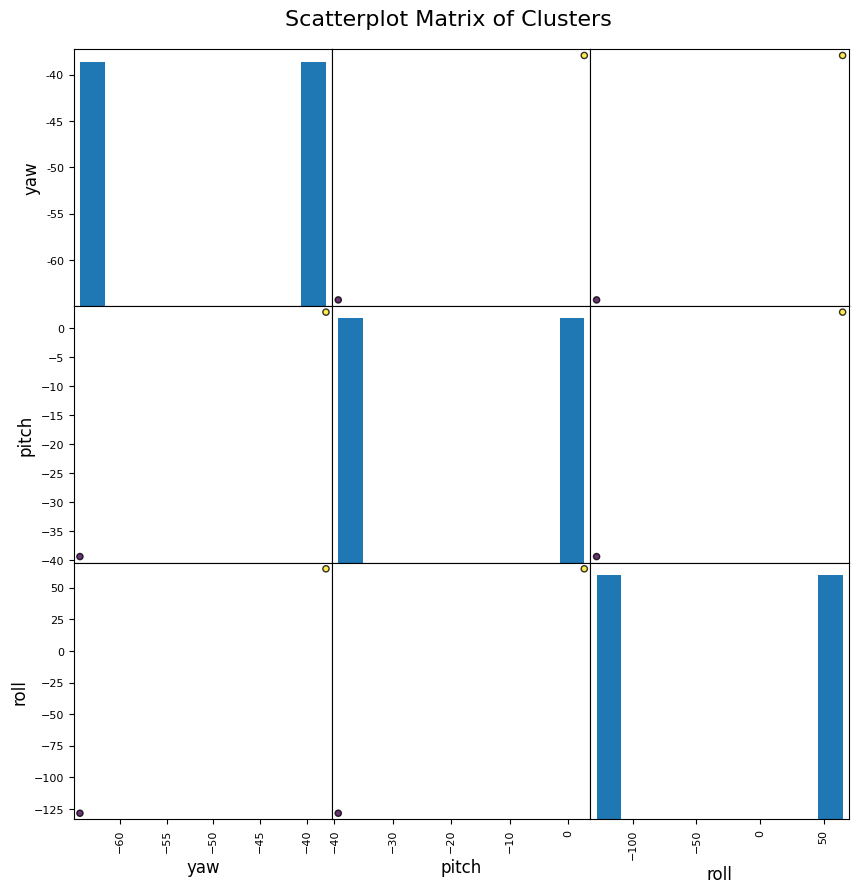

In [5]:
# Create a scatterplot matrix with colors based on the cluster labels
scatter_matrix(mean_values[['yaw', 'pitch', 'roll']], c=mean_values['cluster'], figsize=(10, 10), diagonal='hist', alpha=0.8, s=80, edgecolors='k')

# Customize plot labels and title
for ax in plt.gcf().get_axes():
    ax.set_xlabel(ax.get_xlabel(), fontsize=12)
    ax.set_ylabel(ax.get_ylabel(), fontsize=12)
plt.suptitle('Scatterplot Matrix of Clusters', fontsize=16, y=0.92)

# Show plot
plt.show()

In [6]:
for cluster, participants in mean_values.groupby('cluster')['participant_id']:
    print(f"Cluster {cluster}: {participants.values}")

Cluster 0: [1]
Cluster 1: [2]
